In [1]:
import numpy as np
import pandas as pd

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
print(df_train.shape,df_test.shape)
df_train.head(5)

(15120, 56) (565892, 55)


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [3]:
%matplotlib inline
from matplotlib import pyplot as plt, style
style.use("fivethirtyeight")

(0, 2500)

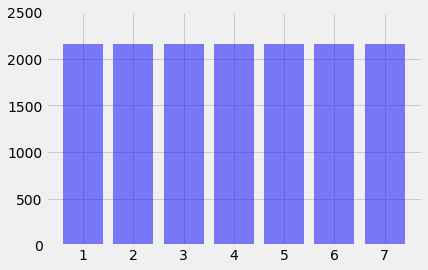

In [4]:
covertype = df_train.Cover_Type.unique()
distribution = [len(df_train[df_train.Cover_Type == ct]) for ct in covertype]
plt.bar(covertype,distribution,color="blue",alpha=0.5,label="total")
plt.ylim((0,2500))
#So, we have equal distribution of samples

Elevation na:0, min:1863, max:3849, mean:2749.3225529100528, std:417.6643750102973


Text(0,0.5,'No of Samples')

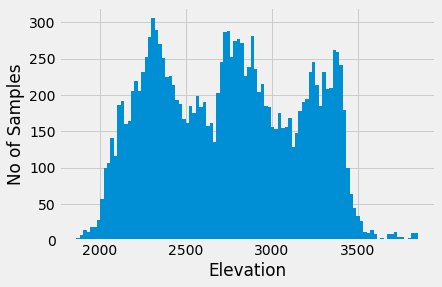

In [5]:
print("Elevation na:{}, min:{}, max:{}, mean:{}, std:{}".format(
    len(df_train[df_train['Elevation'].isna()]),np.min(df_train.Elevation),np.max(df_train.Elevation),
    np.mean(df_train.Elevation),np.std(df_train.Elevation)
))
plt.hist(df_train.Elevation.values,bins=100)
plt.xlabel("Elevation")
plt.ylabel("No of Samples")

Aspect na:0, min:0, max:360, mean:156.67665343915343, std:110.08216092242522


Text(0,0.5,'No of Samples')

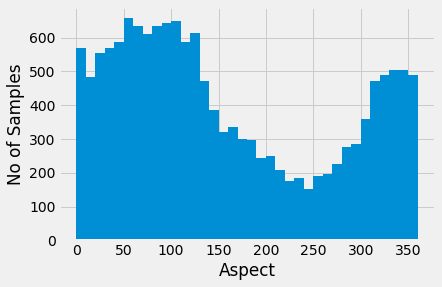

In [6]:
print("Aspect na:{}, min:{}, max:{}, mean:{}, std:{}".format(
    len(df_train[df_train['Aspect'].isna()]),np.min(df_train.Aspect),np.max(df_train.Aspect),
    np.mean(df_train.Aspect),np.std(df_train.Aspect)
))
plt.hist(df_train.Aspect.values,bins=36)
plt.xlabel("Aspect")
plt.ylabel("No of Samples")

Slope na:0, min:0, max:52, mean:16.501587301587303, std:8.4536471963071


Text(0,0.5,'No of Samples')

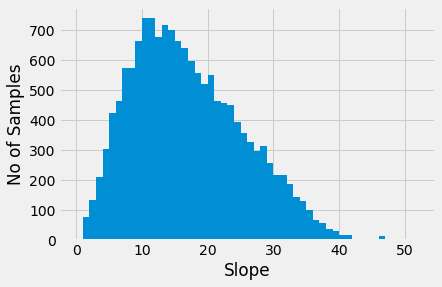

In [7]:
print("Slope na:{}, min:{}, max:{}, mean:{}, std:{}".format(
    len(df_train[df_train['Slope'].isna()]),np.min(df_train.Slope),np.max(df_train.Slope),
    np.mean(df_train.Slope),np.std(df_train.Slope)
))
plt.hist(df_train.Slope.values,bins=52)
plt.xlabel("Slope")
plt.ylabel("No of Samples")

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [9]:
df = df_train.append(df_test,sort=False)
Y = df[:15120]["Cover_Type"]
X_test_ids = df[15120:].Id
df.drop(["Cover_Type","Id"],axis=1,inplace=True)
df = scaler.fit_transform(df)

In [10]:
X = df[:15120]
X_test = df[15120:]
from sklearn.model_selection import train_test_split
Xt,Xv,Yt,Yv = train_test_split(X,Y,test_size=0.2)
print(Xt.shape,Xv.shape,X_test.shape)

(12096, 54) (3024, 54) (565892, 54)


In [11]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout

Using TensorFlow backend.


In [23]:
model=Sequential()
model.add(Dense(90,activation='relu',input_shape=(54,)))
model.add(Dropout(0.2))
model.add(Dense(180,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(90,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(7,activation='softmax'))

In [26]:
from keras.optimizers import adam
from keras.losses import categorical_crossentropy

adam = adam(lr=0.001,decay=0.001,amsgrad=True)
model.compile(adam,loss=categorical_crossentropy,metrics=['accuracy'])

In [27]:
num_classes = 7
batch_size = 8
epochs = 20

from keras.utils import np_utils
Yt_labels = np_utils.to_categorical(Yt.astype('int')-1,num_classes=num_classes)
Yv_labels = np_utils.to_categorical(Yv.astype('int')-1,num_classes=num_classes)

model.fit(Xt,Yt_labels,
         batch_size=batch_size,
         epochs=epochs,
         verbose=1,
         validation_data=(Xv,Yv_labels))

Train on 12096 samples, validate on 3024 samples
Epoch 1/20
12096/12096 [==============================] - 8s 653us/step - loss: 0.8168 - acc: 0.6599 - val_loss: 0.6714 - val_acc: 0.7183
Epoch 2/20
12096/12096 [==============================] - 7s 570us/step - loss: 0.7574 - acc: 0.6846 - val_loss: 0.6610 - val_acc: 0.7259
Epoch 3/20
12096/12096 [==============================] - 7s 576us/step - loss: 0.7282 - acc: 0.6951 - val_loss: 0.6316 - val_acc: 0.7315
Epoch 4/20
12096/12096 [==============================] - 7s 592us/step - loss: 0.7131 - acc: 0.6974 - val_loss: 0.6226 - val_acc: 0.7295
Epoch 5/20
12096/12096 [==============================] - 7s 599us/step - loss: 0.7042 - acc: 0.7035 - val_loss: 0.6186 - val_acc: 0.7361
Epoch 6/20
12096/12096 [==============================] - 8s 623us/step - loss: 0.6970 - acc: 0.7053 - val_loss: 0.6114 - val_acc: 0.7401
Epoch 7/20
12096/12096 [==============================] - 7s 607us/step - loss: 0.6883 - acc: 0.7140 - val_loss: 0.6095 - v

In [28]:
predictLabels = model.predict(X_test)

In [50]:
predictions = np.argmax(predictLabels,axis=1)+1

41994

In [51]:
results = pd.DataFrame({
    "Id":X_test_ids.values,
    "Cover_Type":predictions
})

In [53]:
results.to_csv("sol.csv",index=False)